# 📸 Harris Corner Detection

<b>Harris Corner</b> is a popular algorithm for detecting corners in an image. </br>
Corners are points in the image where the intensity changes significantly in multiple directions. </br>
This notebook demonstrates the implementation of the Harris algorithm step-by-step.


In [761]:
"""
Library Imports
"""

import numpy as np # type: ignore
import pandas as pd # type: ignore
import cv2 as cv # type: ignore
import matplotlib.pyplot as plt # type: ignore

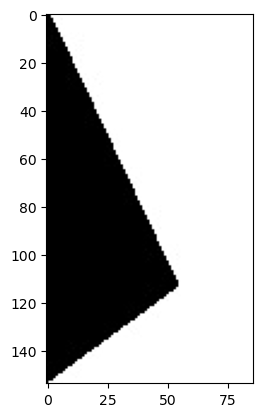

In [762]:
"""
Reading Image
"""

image = cv.imread('../Images/Obtuse.jpg')
I = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
I = np.float32(I)
plt.imshow(I, cmap='gray');

### 🌊 Sobel Filters for Edge Detection

The **Sobel filter** is a popular operator used in image processing to detect edges. It computes the gradient of image intensity in the horizontal and vertical directions, highlighting regions with high spatial frequency that correspond to edges.

#### **Sobel Kernels**:
The Sobel filter uses two 3x3 kernels to compute gradients:
<div align='center'>
<img src='../Src/Sobel.jpg' width=550 hight=250>
</div>

In [763]:

sobelX = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobelY = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])


In [764]:
''' Gradient Products '''

Ix = cv.filter2D(src=I, ddepth=-1, kernel=sobelX)
Iy = cv.filter2D(src=I, ddepth=-1, kernel=sobelY)

Ixx = Ix ** 2
Ixy = Ix * Iy
Iyy = Iy ** 2

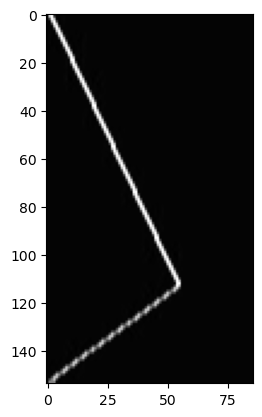

In [765]:
plt.imshow(Ix, cmap='gray');

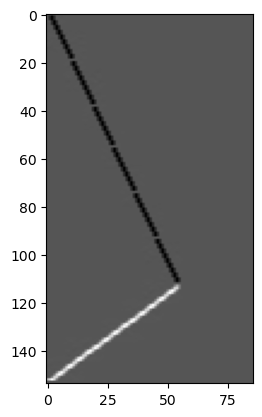

In [766]:
plt.imshow(Iy, cmap='gray');

In [767]:
''' Gaussian Filter for Smoothness
'''

weight = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])

Ixxw = cv.filter2D(src=Ixx, ddepth=-1, kernel=weight)
Ixyw = cv.filter2D(src=Ixy, ddepth=-1, kernel=weight)
Iyyw = cv.filter2D(src=Iyy, ddepth=-1, kernel=weight)


In [768]:
''' Harris response matrix
'''

epsilon = 1e-5
H = ( (Ixxw * Iyyw) - (Ixyw * Ixyw) ) / ( Ixxw + Iyyw + epsilon )


''' Hmax for Thresholding 
'''

Hmax = H.max()


In [769]:
''' kp for saving Key-Points 
    (kp is a mask of Harris response matrix)
'''
kp = np.zeros(np.shape(H)).astype(bool)

In [770]:
for i in range(1, kp.shape[0]-1):
    for j in range(1, kp.shape[1]-1):
        center = H[i][j]
        if center > Hmax * 0.4:
            if center > H[i+1][j]:
                if center > H[i-1][j]:
                    if center > H[i][j+1]:
                        if center > H[i][j-1]:
                            if center > H[i+1][j+1]:
                                if center > H[i+1][j-1]:
                                    if center > H[i-1][j+1]:
                                        if center > H[i-1][j-1]:
                                            kp[i][j] = True

                                        if kp[i][j]:
                                            cv.circle(image, [j,i], 5, [0, 255, 0], 1)

image[kp==True] = [255, 0, 0]

print(kp.sum())



1


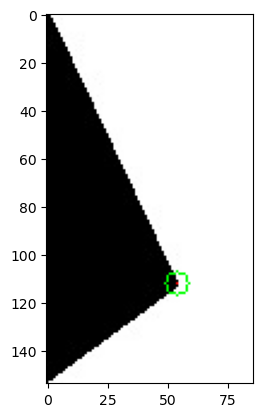

In [771]:
cv.imwrite('../Images/Output/Obtuse-Output.jpg',image)
plt.imshow(image);


# 📝 Homework:

Our input images have one and only one **KEY POINT**, so the ```kp_list``` only contain one **KEY POINT** and the ```all_points``` list contain the key point and 8 other neighbor points !

The ```df``` DataFrame contains key point & 8 neighbor points (8 + 1 = 9) and their data such as cordinate, Gradient Size, Ix, Iy and so on !

**NOTICE:**
This code only work with Images which contain one Key Point !

In [772]:
kp_list = []

for i in range(1, kp.shape[0]-1):
    for j in range(1, kp.shape[1]-1):
        if kp[i][j] == True:
            kp_list.append((i,j))

print(kp_list)

[(112, 54)]


In [773]:
all_points = []
for point in kp_list:
    all_points.append((point[0]-1,point[1]-1))
    all_points.append((point[0]-1,point[1]))
    all_points.append((point[0]-1,point[1]+1))
    all_points.append((point[0]+1,point[1]-1))
    all_points.append((point[0]+1,point[1]+1))
    all_points.append((point[0]+1,point[1]))
    all_points.append((point[0],point[1]))
    all_points.append((point[0],point[1]-1))
    all_points.append((point[0],point[1]+1))

all_points


[(111, 53),
 (111, 54),
 (111, 55),
 (113, 53),
 (113, 55),
 (113, 54),
 (112, 54),
 (112, 53),
 (112, 55)]

In [774]:
df = pd.DataFrame(columns=["(x, y)","Ix", "Iy", "Iy/Ix", "Sector", "|| G ||"])
df

,"(x, y)",Ix,Iy,Iy/Ix,Sector,|| G ||



# 🧭 Angle Sectors Visualization 🌟
The following diagram illustrates the angle ranges for the gradient directions in an image. 
These ranges are essential for determining the sector each point belongs to.

<!-- ![Angle Sectors](../src/wheel.jpg) -->

<div align="center">
<img src="../Src/wheel.jpg" hight=250, width=250 class="center">
</div>

### Sector Angle Ranges in Mathematical Notation 📐

$Sector1 : -22.5^\circ \leq \theta \leq 22.5^\circ$  

$Sector 1: 22.5^\circ < \theta \leq 67.5^\circ$  

$Sector 2: 67.5^\circ < \theta \leq 112.5^\circ$  

$Sector 3: 112.5^\circ < \theta \leq 157.5^\circ$  

$Sector 4: 157.5^\circ \leq \theta \leq 180^\circ$ or $-180^\circ \leq \theta < -157.5^\circ$  

$Sector 5: -157.5^\circ \leq \theta < -112.5^\circ$  

$Sector 6: -112.5^\circ \leq \theta < -67.5^\circ$  

$Sector 7: -67.5^\circ \leq \theta < -22.5^\circ$  


In [775]:
def sector(point):

    angle = np.degrees(np.arctan2(Iy[point], Ix[point]))
    
    if angle < -180:
        angle += 360
    elif angle > 180:
        angle -= 360

    # Sector 0: -22.5° to 22.5°
    if -22.5 <= angle < 22.5:
        return 0  
    
    # Sector 1: 22.5° to 67.5°
    elif 22.5 <= angle < 67.5:
        return 1
    
    # Sector 2: 67.5° to 112.5°
    elif 67.5 <= angle < 112.5:
        return 2

    # Sector 3: 112.5° to 157.5°  
    elif 112.5 <= angle < 157.5:
        return 3

    # Sector 4: 157.5° to -157.5°
    elif 157.5 <= angle <= 180 or -180 <= angle < -157.5:
        return 4

    # Sector 5: -157.5° to -112.5°
    elif -157.5 <= angle < -112.5:
        return 5
    
    # Sector 6: -112.5° to -67.5°
    elif -112.5 <= angle < -67.5:
        return 6 
    
    # Sector 7: -67.5° to -22.5°
    elif -67.5 <= angle < -22.5:
        return 7 



In [776]:
for point in all_points:
    df.loc[len(df)] = [point, Ix[point], Iy[point], Iy[point]/(Ix[point]+10e-5), sector(point), Ix[point]+Iy[point]]

In [777]:
df.index = range(1, len(df) + 1)
df.index.name = 'Point Number'
df

,"(x, y)",Ix,Iy,Iy/Ix,Sector,|| G ||
Point Number,,,,,,
1,"(111, 53)",256.0,-254.0,-0.992187,7,2.0
2,"(111, 54)",1015.0,-509.0,-0.501478,7,506.0
3,"(111, 55)",763.0,-255.0,-0.334207,0,508.0
4,"(113, 53)",253.0,253.0,1.000000,1,506.0
5,"(113, 55)",765.0,255.0,0.333333,0,1020.0
6,"(113, 54)",1015.0,509.0,0.501478,1,1524.0
7,"(112, 54)",1014.0,2.0,0.001972,0,1016.0
8,"(112, 53)",0.0,4.0,40000.000000,2,4.0
9,"(112, 55)",1019.0,3.0,0.002944,0,1022.0


In [778]:
sums = df.groupby("Sector")["|| G ||"].sum()
sums

Sector
0    3566.0
1    2030.0
2       4.0
7     508.0
Name: || G ||, dtype: float32

In [779]:
vec = np.array([0,0,0,0,0,0,0,0])

for i in range(8):
    try:
        vec[i] = sums[i]
    except:
        vec[i] = 0

vec = vec.reshape(8,1)
print(vec);

[[3566]
 [2030]
 [   4]
 [   0]
 [   0]
 [   0]
 [   0]
 [ 508]]


In [780]:
vec = {
    '0':vec[0][0],
    '1':vec[1][0],
    '2':vec[2][0],
    '3':vec[3][0],
    '4':vec[4][0],
    '5':vec[5][0],
    '6':vec[6][0],
    '7':vec[7][0],
}

vec

{'0': 3566, '1': 2030, '2': 4, '3': 0, '4': 0, '5': 0, '6': 0, '7': 508}

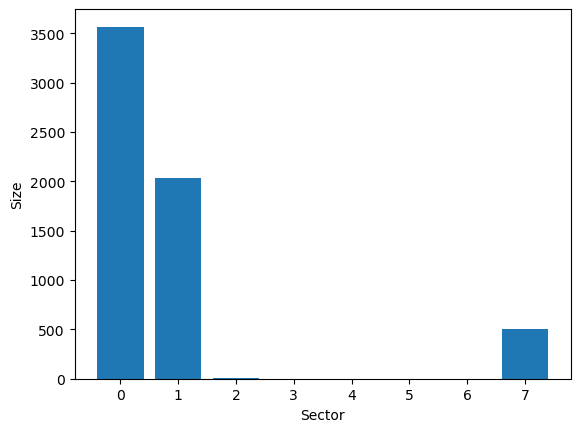

In [783]:
plt.bar(list(vec.keys()),list(vec.values()));
plt.xlabel("Sector");
plt.ylabel("Size");
